In [1]:
# This is the Package of Hugging face for NLP
!pip install nlp

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 243 kB 52.9 MB/s 


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nlp
import tensorflow as tf
import random
import os
%matplotlib inline

In [3]:
def show_history(h):
    # Monitoring the Loss of each Epoch
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(9, 9))
    # Plotting One row and Two Cols and the plot in the 1st One
    plt.subplot(1, 2, 1)
    # For training Data
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    # For Validation Data
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    # Plotting the Loss for the Training Data
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    # Plotting the Loss for the Validation Data
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    

In [4]:
# A function for Confusion Matrix
from sklearn.metrics import confusion_matrix
def show_confusion_matrix(y_true, y_pred, classes):
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(9, 9))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


In [5]:
def create_model_checkpoint(model_name, save_path="./model_checkpoints"):
  # create filepath to save model
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, 
                                            save_best_only=True)

In [6]:
# Bringing in the Data
data=nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [7]:
data
# 80-10-10 Split for Train Test and Validation Data here.

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [8]:
# Since the Dataset already has keys specified for each of train test and split
# We can easily segment the data accordingly
# So currently all of them are sets with pairs of tweets and emotion labels
train=data['train']
val=data['validation']
test=data['test']

In [9]:
# Making a function to Extract the tweet and the label
def get_tweet_data(data):
  tweets=[x['text'] for x in data]
  emotions=[x['label'] for x in data]
  return tweets,emotions

In [10]:
tweets,emotions=get_tweet_data(train)

In [11]:
tweets[:10],emotions[:10]

(['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too'],
 ['sadness',
  'sadness',
  'anger',
  'love',
  'anger',
  'sadness',
  'surprise',
  'fear',
  'joy',
  'love'])

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Basically what Tokenizer does is that it gives a Corpus to the words and then 
# Converts them into Numbers so that they can be fed into a Model
# Also we can exclude some words as out_of_vocab or include most common xxxx... words as words_in_vocab
tokenizer=Tokenizer(num_words=10000,oov_token='<out_of_vocab>')
# Now we will have to create a Mapping to the data
tokenizer.fit_on_texts(tweets)

In [13]:
# Visualizing what the TOkenizer object does to a Tweet
# i didnt feel humiliated',
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [14]:
# Padding or Truncating the Sentences so that they have fixed Input Shapes
# So by performing this step we will bring them to the same 
length=[len(t.split(' ')) for t in tweets]
# Iterating over the Tweets Data and Splitting them by a space to count the Length of each tweet in arr
length[:10]

[4, 21, 10, 18, 4, 12, 23, 17, 19, 4]

In [15]:
# Calculating the Average Length
def get_average(data):
  count=0
  d_len=0
  for d in data:
    d_len=d_len+len(d.split(' '))
    count=count+1
  avg=d_len/count
  return avg


In [16]:
get_average(tweets)

19.1663125

(array([  8.,  45., 310., 488., 539., 625., 626., 629., 613., 636., 654.,
        655., 608., 622., 609., 603., 559., 535., 530., 510., 452., 430.,
        382., 385., 330., 327., 336., 317., 238., 208., 200., 200., 167.,
        157., 141., 144., 120., 117., 117.,  88.,  96.,  72.,  66.,  66.,
         65.,  52.,  37.,  43.,  30.,  32.,  31.,  26.,  30.,  20.,  23.,
         14.,   9.,  10.,   4.,   4.,   4.,   1.,   4.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.]),
 <a list of 64 Patch objects>)

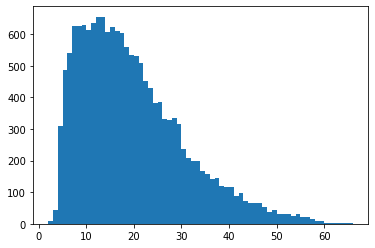

In [17]:
# But average might not be a good way to Quantify the data so we will plot a HISTOGRAM
plt.hist(length,bins=len(set(length)))

In [18]:
# So clearly we cannot do such a Task of getting them to 19.2
# We will have to accomodate larger tweets and so we will define a Higher threshold
max_len=54
# Tweets smaller will be padded and bigger will be Truncated
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [19]:
def make_sequences(tokenizer,data):
  sequences=tokenizer.texts_to_sequences(data)
  padded_seq=pad_sequences(sequences,truncating='post',padding='post',maxlen=max_len)
  return padded_seq

In [20]:
padded_train_seq=make_sequences(tokenizer,tweets)
padded_train_seq[:9]

array([[   2,  139,    3,  679,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   40,  101,   60,    8,   15,  494,    5,   15, 3496,  553,
          32,   60,   61,  128,  148,   76, 1480,    4,   22, 1255,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  17, 3060,    7, 1149,    5,  286,    2,    3,  495,  438,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0

In [21]:
# Getting our Multi-class Labels of Emotions into Numeric Form
# Making a set to get the unique values  of emotions in classes
classes=set(emotions)
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

(array([4666.,    0., 2159.,    0., 1304.,    0.,  572.,    0., 1937.,
           0., 5362.]),
 array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
        2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
        4.54545455, 5.        ]),
 <a list of 11 Patch objects>)

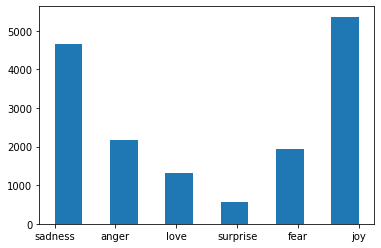

In [22]:
# Plotting a Histogram to check the Number of tweets per Emotion
plt.hist(emotions,bins=11)

In [23]:
# There are ways to solve the Class Imbalance Problem
# These dictionaries can be used to get the Index and Class name interchangably as and when required
classes_to_index=dict((c,i) for i,c in enumerate(classes))
index_to_class=dict((v,k) for k,v in classes_to_index.items())
classes_to_index,index_to_class

({'anger': 0, 'fear': 4, 'joy': 5, 'love': 3, 'sadness': 2, 'surprise': 1},
 {0: 'anger', 1: 'surprise', 2: 'sadness', 3: 'love', 4: 'fear', 5: 'joy'})

In [24]:
# Lambda Function for creating all the emotions to a Class Label
names_to_ids=lambda emotions : np.array ([classes_to_index.get(x) for x in emotions])

In [25]:
train_labels=names_to_ids(emotions)

In [32]:
from tensorflow.keras import layers
model=tf.keras.Sequential([
         tf.keras.layers.Embedding(10000,16,input_length=54),
         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
         tf.keras.layers.Dense(6,activation='softmax')

],name="model_1_Bidirectional_RNN")
# Sparse Categorical cross_entropy since the data is not 1-H-E
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [33]:
model.summary()

Model: "model_1_Bidirectional_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 54, 16)            160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 54, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [28]:

val_tweets,val_emotions=get_tweet_data(val)
val_sequences=make_sequences(tokenizer,val_tweets)
val_labels=names_to_ids(val_emotions)

In [29]:
#  Checking the Tweets, it's  seq representation and it's Emotion
val_tweets[0],val_sequences[0],val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 array([ 17,   8, 157, 260,   4, 343,  16,  51,  19, 212,   1,  50,  10,
         13, 533,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0], dtype=int32),
 2)

In [34]:
# Training the Model
# Fitting the Model
m1=model.fit(padded_train_seq,train_labels,epochs=20,validation_data=(val_sequences,val_labels),callbacks=[create_model_checkpoint(model_name=model.name)])

Epoch 1/20
500/500 [==============================] - ETA: 0s - loss: 1.2967 - accuracy: 0.4911

INFO:tensorflow:Assets written to: ./model_checkpoints/model_1_Bidirectional_RNN/assets


INFO:tensorflow:Assets written to: ./model_checkpoints/model_1_Bidirectional_RNN/assets


500/500 [==============================] - 104s 126ms/step - loss: 1.2967 - accuracy: 0.4911 - val_loss: 0.7772 - val_accuracy: 0.7335
Epoch 2/20
500/500 [==============================] - ETA: 0s - loss: 0.4910 - accuracy: 0.8298

INFO:tensorflow:Assets written to: ./model_checkpoints/model_1_Bidirectional_RNN/assets


INFO:tensorflow:Assets written to: ./model_checkpoints/model_1_Bidirectional_RNN/assets


500/500 [==============================] - 62s 125ms/step - loss: 0.4910 - accuracy: 0.8298 - val_loss: 0.4855 - val_accuracy: 0.8300
Epoch 3/20
500/500 [==============================] - ETA: 0s - loss: 0.2663 - accuracy: 0.9131

INFO:tensorflow:Assets written to: ./model_checkpoints/model_1_Bidirectional_RNN/assets


INFO:tensorflow:Assets written to: ./model_checkpoints/model_1_Bidirectional_RNN/assets


500/500 [==============================] - 62s 124ms/step - loss: 0.2663 - accuracy: 0.9131 - val_loss: 0.4127 - val_accuracy: 0.8635
Epoch 4/20
500/500 [==============================] - ETA: 0s - loss: 0.1895 - accuracy: 0.9359

INFO:tensorflow:Assets written to: ./model_checkpoints/model_1_Bidirectional_RNN/assets


INFO:tensorflow:Assets written to: ./model_checkpoints/model_1_Bidirectional_RNN/assets


500/500 [==============================] - 63s 126ms/step - loss: 0.1895 - accuracy: 0.9359 - val_loss: 0.3580 - val_accuracy: 0.8895
Epoch 5/20
500/500 [==============================] - 31s 62ms/step - loss: 0.1256 - accuracy: 0.9588 - val_loss: 0.3592 - val_accuracy: 0.8875
Epoch 6/20
500/500 [==============================] - 31s 63ms/step - loss: 0.0897 - accuracy: 0.9712 - val_loss: 0.3817 - val_accuracy: 0.8870
Epoch 7/20
500/500 [==============================] - 31s 63ms/step - loss: 0.0708 - accuracy: 0.9769 - val_loss: 0.3636 - val_accuracy: 0.8965
Epoch 8/20
500/500 [==============================] - 31s 62ms/step - loss: 0.0758 - accuracy: 0.9751 - val_loss: 0.4311 - val_accuracy: 0.8905
Epoch 9/20
500/500 [==============================] - 31s 61ms/step - loss: 0.0576 - accuracy: 0.9811 - val_loss: 0.3855 - val_accuracy: 0.8990
Epoch 10/20
500/500 [==============================] - 31s 61ms/step - loss: 0.0561 - accuracy: 0.9815 - val_loss: 0.4170 - val_accuracy: 0.8935
E

In [36]:
model_1=tf.keras.models.load_model("/content/model_checkpoints/model_1_Bidirectional_RNN")
model_1.evaluate(val_sequences,val_labels)

63/63 [==============================] - 3s 21ms/step - loss: 0.3580 - accuracy: 0.8895


[0.3580141067504883, 0.8895000219345093]

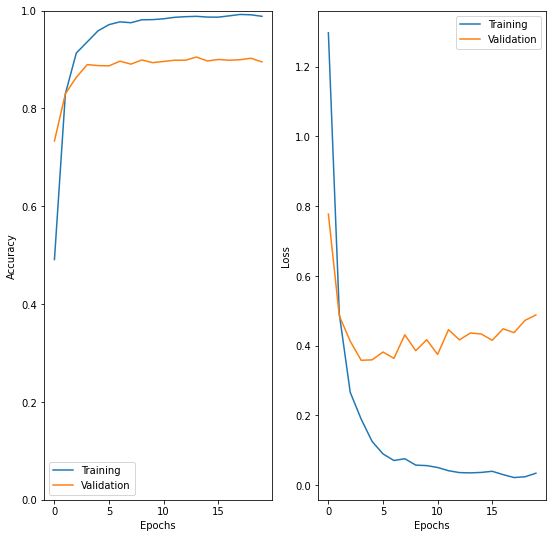

In [37]:
show_history(m1)

In [38]:

test_tweets,test_emotions=get_tweet_data(test)
test_sequences=make_sequences(tokenizer,test_tweets)
test_labels=names_to_ids(test_emotions)

In [39]:
m1_r=model.evaluate(x=test_sequences,y=test_labels)

63/63 [==============================] - 1s 22ms/step - loss: 0.5581 - accuracy: 0.8740


In [49]:
n=random.randint(0,len(test_labels)-1)
# Printing the actual tweet text and the Emotion associated with it
print(test_tweets[n])
print('Emotion',index_to_class[test_labels[n]])
prediction=model.predict(np.expand_dims(test_sequences[n],axis=0))[0]
prediction_emotion=index_to_class[np.argmax(prediction).astype('uint8')]
prediction_emotion

i could feel my mother s sympathetic dread as i was diagnosed
Emotion love


'love'